# Scraping TOP 250 Movies (IMDb Website) and Analyzing the Data

## Getting the Data

In [2]:
#installing the needed libraries (only needed once)
"""
!pip3 install requests
!pip3 install bs4
!pip3 install pandas
"""

'\n!pip3 install requests\n!pip3 install bs4\n!pip3 install pandas\n'

In [3]:
#importing the needed libraries
import requests as r
from bs4 import BeautifulSoup as bs
import pandas as pd

In [4]:
#parsing the data to process later & extract the values of our interest: 
#movie rank, name, year & rating into the main table
link = "https://www.imdb.com/chart/top/"
headers = {"Accept-Language": "en-US"}
response = r.get(link, headers = headers)
soup_response = bs(response.text, "html.parser")

In [4]:
#establishing the needed variables (lists & string)
data = []
link_beginning = "https://www.imdb.com"
links = []
additional_data = []

In [5]:
#extracting just the needed data
movies_data = soup_response.find("tbody", class_ = "lister-list").find_all("tr")

In [6]:
#extracting the values of interest & filling up the created list with the disctionaries for each movie
#also, creating a list with just the links for additional scraping
for movie_data in movies_data: 
    movie_rank = movie_data.find("td", class_ = "titleColumn").get_text(strip = True).split(".")[0]
    movie_name = movie_data.find("td", class_ = "titleColumn").a.text
    movie_year = movie_data.find("td", class_ = "titleColumn").span.text.strip("()")
    movie_rating = movie_data.find("td", class_ = "ratingColumn imdbRating").strong.text
    movie_link_raw = movie_data.find("td", class_ = "titleColumn").a.get("href")
    movie_link = f"{link_beginning}{movie_link_raw}"        
    movie_dictionary = {"rank": int(movie_rank),
                        "name": str(movie_name),
                        "year": int(movie_year),
                        "rating": float(movie_rating),
                        "link": str(movie_link)}
    data.append(movie_dictionary)
    links.append(movie_link)

In [7]:
#checking the data in the list
for data_point in data:
    print(data_point["rank"], data_point["name"], data_point["year"], data_point["rating"], data_point["link"])

1 The Shawshank Redemption 1994 9.2 https://www.imdb.com/title/tt0111161/
2 The Godfather 1972 9.2 https://www.imdb.com/title/tt0068646/
3 The Dark Knight 2008 9.0 https://www.imdb.com/title/tt0468569/
4 The Godfather Part II 1974 9.0 https://www.imdb.com/title/tt0071562/
5 12 Angry Men 1957 9.0 https://www.imdb.com/title/tt0050083/
6 Schindler's List 1993 8.9 https://www.imdb.com/title/tt0108052/
7 The Lord of the Rings: The Return of the King 2003 8.9 https://www.imdb.com/title/tt0167260/
8 Pulp Fiction 1994 8.8 https://www.imdb.com/title/tt0110912/
9 The Lord of the Rings: The Fellowship of the Ring 2001 8.8 https://www.imdb.com/title/tt0120737/
10 The Good, the Bad and the Ugly 1966 8.8 https://www.imdb.com/title/tt0060196/
11 Forrest Gump 1994 8.8 https://www.imdb.com/title/tt0109830/
12 Fight Club 1999 8.7 https://www.imdb.com/title/tt0137523/
13 Inception 2010 8.7 https://www.imdb.com/title/tt1375666/
14 The Lord of the Rings: The Two Towers 2002 8.7 https://www.imdb.com/title/t

In [8]:
#converting the created list to a data frame and checking it
main_df = pd.DataFrame(data)
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rank    250 non-null    int64  
 1   name    250 non-null    object 
 2   year    250 non-null    int64  
 3   rating  250 non-null    float64
 4   link    250 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 9.9+ KB


In [9]:
#checking the data in main_df
main_df.head()

,rank,name,year,rating,link
0,1,The Shawshank Redemption,1994,9.2,https://www.imdb.com/title/tt0111161/
1,2,The Godfather,1972,9.2,https://www.imdb.com/title/tt0068646/
2,3,The Dark Knight,2008,9.0,https://www.imdb.com/title/tt0468569/
3,4,The Godfather Part II,1974,9.0,https://www.imdb.com/title/tt0071562/
4,5,12 Angry Men,1957,9.0,https://www.imdb.com/title/tt0050083/


In [10]:
#getting some additional data (this takes some time - Rome wasn't built in a day)
#it takes that long because for each movie (and we have 250 of those!) we open a new page and scrape the data from there
for link in links:
    response_link = r.get(link, headers = headers)
    soup_response_link = bs(response_link.text, "html.parser")
    genres_raw_data = soup_response_link.find_all("span", class_ = "ipc-chip__text")
    genres_list = []
    for genre in genres_raw_data:
        genres_list.append(genre.text)
    main_genre = genres_list[0]
    genres = ",".join(genres_list)
    description = soup_response_link.find("span", class_ = "sc-16ede01-0 fMPjMP").text
    picture_link_raw = soup_response_link.find("a", class_ = "ipc-lockup-overlay ipc-focusable").get("href")
    picture_link = f"{link_beginning}{picture_link_raw}"
    movie_dictionary_additional = {"link": str(link),
                        "main_genre": str(main_genre),
                        "genres": str(genres),
                        "description": str(description),
                        "picture_link": str(picture_link)}
    additional_data.append(movie_dictionary_additional)

In [11]:
#establishing a new data frame based on the data from additional_df and checking it
additional_df = pd.DataFrame(additional_data)
additional_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   link          250 non-null    object
 1   main_genre    250 non-null    object
 2   genres        250 non-null    object
 3   description   250 non-null    object
 4   picture_link  250 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [12]:
#checking the data in additional_df
additional_df.head()

,link,main_genre,genres,description,picture_link
0,https://www.imdb.com/title/tt0111161/,Drama,Drama,Two imprisoned men bond over a number of years...,https://www.imdb.com/title/tt0111161/mediaview...
1,https://www.imdb.com/title/tt0068646/,Crime,"Crime,Drama",The aging patriarch of an organized crime dyna...,https://www.imdb.com/title/tt0068646/mediaview...
2,https://www.imdb.com/title/tt0468569/,Action,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,https://www.imdb.com/title/tt0468569/mediaview...
3,https://www.imdb.com/title/tt0071562/,Crime,"Crime,Drama",The early life and career of Vito Corleone in ...,https://www.imdb.com/title/tt0071562/mediaview...
4,https://www.imdb.com/title/tt0050083/,Crime,"Crime,Drama",The jury in a New York City murder trial is fr...,https://www.imdb.com/title/tt0050083/mediaview...


In [13]:
#joining our main_df and additional_df and checking it 
df = pd.merge(main_df, additional_df, on = "link", how = "inner")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          250 non-null    int64  
 1   name          250 non-null    object 
 2   year          250 non-null    int64  
 3   rating        250 non-null    float64
 4   link          250 non-null    object 
 5   main_genre    250 non-null    object 
 6   genres        250 non-null    object 
 7   description   250 non-null    object 
 8   picture_link  250 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 19.5+ KB


In [15]:
#dropping the duplicates (just in case) and checking everything once again
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          250 non-null    int64  
 1   name          250 non-null    object 
 2   year          250 non-null    int64  
 3   rating        250 non-null    float64
 4   link          250 non-null    object 
 5   main_genre    250 non-null    object 
 6   genres        250 non-null    object 
 7   description   250 non-null    object 
 8   picture_link  250 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 19.5+ KB


In [18]:
#saving the data to a file for further analysis in other tools
df.to_csv("top_250_movies", index = False)

In [28]:
#checking the data
df.head()

,rank,name,year,rating,link,main_genre,genres,description,picture_link
0,1,The Shawshank Redemption,1994,9.2,https://www.imdb.com/title/tt0111161/,Drama,Drama,Two imprisoned men bond over a number of years...,https://www.imdb.com/title/tt0111161/mediaview...
1,2,The Godfather,1972,9.2,https://www.imdb.com/title/tt0068646/,Crime,"Crime,Drama",The aging patriarch of an organized crime dyna...,https://www.imdb.com/title/tt0068646/mediaview...
2,3,The Dark Knight,2008,9.0,https://www.imdb.com/title/tt0468569/,Action,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,https://www.imdb.com/title/tt0468569/mediaview...
3,4,The Godfather Part II,1974,9.0,https://www.imdb.com/title/tt0071562/,Crime,"Crime,Drama",The early life and career of Vito Corleone in ...,https://www.imdb.com/title/tt0071562/mediaview...
4,5,12 Angry Men,1957,9.0,https://www.imdb.com/title/tt0050083/,Crime,"Crime,Drama",The jury in a New York City murder trial is fr...,https://www.imdb.com/title/tt0050083/mediaview...


In [5]:
#in case I accidentaly close this file I can just import the file with the data w/o wating for it to scrape
#df = pd.read_csv("top_250_movies")

In [6]:
#creating a dataset for analysis
df_analysis = df[["rank", "name", "year", "rating", "main_genre"]]

In [7]:
#checking the data
df_analysis.head()

,rank,name,year,rating,main_genre
0,1,The Shawshank Redemption,1994,9.2,Drama
1,2,The Godfather,1972,9.2,Crime
2,3,The Dark Knight,2008,9.0,Action
3,4,The Godfather Part II,1974,9.0,Crime
4,5,12 Angry Men,1957,9.0,Crime


In [70]:
#checking the quality of our data frame for analysis
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rank        250 non-null    int64  
 1   name        250 non-null    object 
 2   year        250 non-null    int64  
 3   rating      250 non-null    float64
 4   main_genre  250 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 9.9+ KB


## Analyzing the Data

Please keep in mind that my goal is not to drive any conclusions from the scraped data but just to "play around" with it and refresh my knowledge :)

In [131]:
#let's describe our numerical data
df_analysis[["rating", "year"]].describe()

,rating,year
count,250.000000,250.000000
mean,8.252800,1986.488000
std,0.236125,25.225287
min,8.000000,1921.000000
25%,8.100000,1966.250000
50%,8.200000,1994.000000
75%,8.400000,2006.750000
max,9.200000,2022.000000


In [19]:
#what are the latest releases in our table
df_analysis.sort_values(by = "year", ascending = False).head(10)

,rank,name,year,rating,link
220,221,Everything Everywhere All at Once,2022,8.0,https://www.imdb.com/title/tt6710474/
79,80,Top Gun: Maverick,2022,8.3,https://www.imdb.com/title/tt1745960/
226,227,Jai Bhim,2021,8.0,https://www.imdb.com/title/tt15097216/
140,141,Spider-Man: No Way Home,2021,8.2,https://www.imdb.com/title/tt10872600/
129,130,The Father,2020,8.2,https://www.imdb.com/title/tt10272386/
107,108,Hamilton,2020,8.2,https://www.imdb.com/title/tt8503618/
33,34,Parasite,2019,8.5,https://www.imdb.com/title/tt6751668/
194,195,Klaus,2019,8.1,https://www.imdb.com/title/tt4729430/
209,210,Ford v Ferrari,2019,8.0,https://www.imdb.com/title/tt1950186/
77,78,Avengers: Endgame,2019,8.3,https://www.imdb.com/title/tt4154796/


In [132]:
#let's see the latest releases with the rating value that is higher than the average one
filtered_movies = df_analysis.loc[df_analysis["rating"] > df_analysis["rating"].mean()]
filtered_movies.sort_values(by = "year", ascending = False).head(10)

,rank,name,year,rating,main_genre,year_bins
79,80,Top Gun: Maverick,2022,8.3,Action,2020th
77,78,Avengers: Endgame,2019,8.3,Action,2010th
33,34,Parasite,2019,8.5,Drama,2010th
70,71,Joker,2019,8.3,Crime,2010th
63,64,Avengers: Infinity War,2018,8.4,Action,2010th
66,67,Spider-Man: Into the Spider-Verse,2018,8.3,Animation,2010th
91,92,Capernaum,2018,8.3,Drama,2010th
74,75,Coco,2017,8.3,Animation,2010th
82,83,Your Name.,2016,8.3,Animation,2010th
41,42,Whiplash,2014,8.5,Drama,2010th


In [36]:
#now let's do the same, but select the columns that interest us the most
filtered_movies = df_analysis.loc[df["rating"] >= df_analysis["rating"].mean()]
filtered_movies[["year", "name", "rating"]].sort_values(by = "year", ascending = False).head(10)

,year,name,rating
79,2022,Top Gun: Maverick,8.3
77,2019,Avengers: Endgame,8.3
33,2019,Parasite,8.5
70,2019,Joker,8.3
63,2018,Avengers: Infinity War,8.4
66,2018,Spider-Man: Into the Spider-Verse,8.3
91,2018,Capernaum,8.3
74,2017,Coco,8.3
82,2016,Your Name.,8.3
41,2014,Whiplash,8.5


In [43]:
#let's see the average rating per year
df_analysis[["year", "rating"]].groupby("year", sort = True).mean().round(2)

,rating
year,
1921,8.20
1924,8.10
1925,8.10
1926,8.10
1927,8.20
...,...
2018,8.30
2019,8.23
2020,8.20


In [42]:
#and the median, just in case
df_analysis[["year", "rating"]].groupby("year", sort = True).median()

,rating
year,
1921,8.20
1924,8.10
1925,8.10
1926,8.10
1927,8.20
...,...
2018,8.30
2019,8.25
2020,8.20


In [49]:
#is there any correlation between the year and the rating (like do the neweest movies get higher ratings)?
df_analysis[["year", "rating"]].corr()
#doesn't seem so

,year,rating
year,1.000000,0.040697
rating,0.040697,1.000000


<AxesSubplot: xlabel='year', ylabel='rating'>

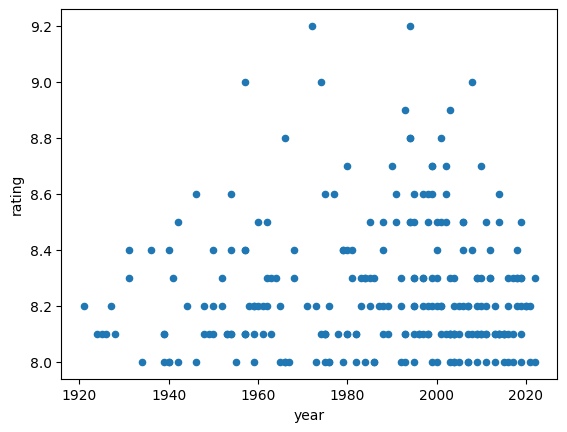

In [50]:
#let's support our data with a plot
df_analysis.plot.scatter(x = "year", y = "rating")

In [52]:
#let's see how many movies we have per year
df_analysis.groupby("year", sort = True).size()

year
1921    1
1924    1
1925    1
1926    1
1927    1
       ..
2018    4
2019    6
2020    2
2021    2
2022    2
Length: 86, dtype: int64

In [9]:
#that's too many years displaying, let's create bins and add them to our data frame
#bins = [year for year in range(df_analysis["year"].min(), df_analysis["year"].max(), 10)]
bins = [year for year in range(1920, 2031, 10)]
bins_names = [f"{bin}th" for bin in bins]
df_analysis = df_analysis.copy()
df_analysis["year_bins"] = pd.cut(df_analysis.loc[:, "year"], bins, labels = bins_names[:-1])
df_analysis.sort_values(by = "year", ascending = True).head(5)

,rank,name,year,rating,main_genre,year_bins
127,128,The Kid,1921,8.2,Comedy,1920th
191,192,Sherlock Jr.,1924,8.1,Action,1920th
174,175,The Gold Rush,1925,8.1,Adventure,1920th
185,186,The General,1926,8.1,Action,1920th
114,115,Metropolis,1927,8.2,Drama,1920th


In [90]:
#now we can see the number of movies per year bin (decades)
df_analysis.groupby("year_bins", sort = True).size()

year_bins
1920th     6
1930th    10
1940th    12
1950th    22
1960th    16
1970th    23
1980th    24
1990th    45
2000th    48
2010th    40
2020th     4
dtype: int64

In [10]:
#too bad we only have a couple of movies from the 1920th and the 2020th, 
#let's see how many movies are in our data frame per year for each decade
(df_analysis.groupby("year_bins", sort = True).size()/df_analysis.groupby("year_bins", sort = True)['year'].nunique()).round(2)

year_bins
1920th    1.00
1930th    2.00
1940th    1.71
1950th    2.75
1960th    2.00
1970th    2.30
1980th    2.40
1990th    4.50
2000th    4.80
2010th    4.00
2020th    2.00
dtype: float64

In [100]:
#what's the average rating per decade?
(df_analysis[["year_bins", "rating"]].groupby("year_bins", sort = True).mean()).round(2)

,rating
year_bins,
1920th,8.13
1930th,8.17
1940th,8.22
1950th,8.25
1960th,8.23
1970th,8.29
1980th,8.24
1990th,8.35
2000th,8.26


<AxesSubplot: title={'center': 'AVG Rating per Year Bin'}, xlabel='Main Genre', ylabel='AVG Rating'>

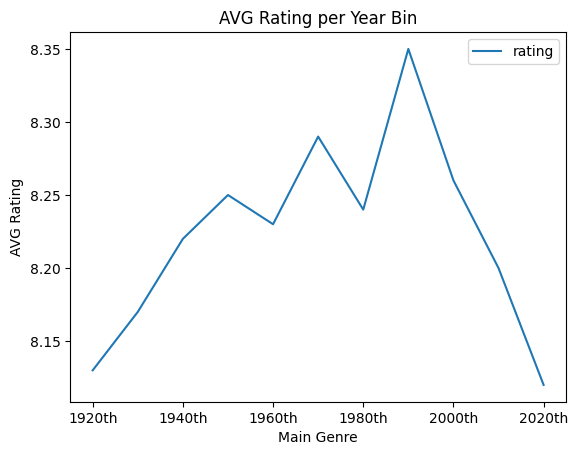

In [118]:
#let's visualize the data
((df_analysis[["year_bins", "rating"]].groupby("year_bins", sort = True).mean()).round(2)).plot(kind = "line", title = "AVG Rating per Year Bin", xlabel = "Main Genre", ylabel = "AVG Rating")

In [101]:
#what's the average rating per main genre?
(df_analysis[["main_genre", "rating"]].groupby("main_genre", sort = True).mean()).round(2)
#90th was a blast!

,rating
main_genre,
Action,8.31
Adventure,8.19
Animation,8.20
Biography,8.22
Comedy,8.20
Crime,8.34
Drama,8.24
Film-Noir,8.10
Horror,8.25


<AxesSubplot: title={'center': 'AVG Rating per Main Genre'}, xlabel='Main Genre', ylabel='AVG Rating'>

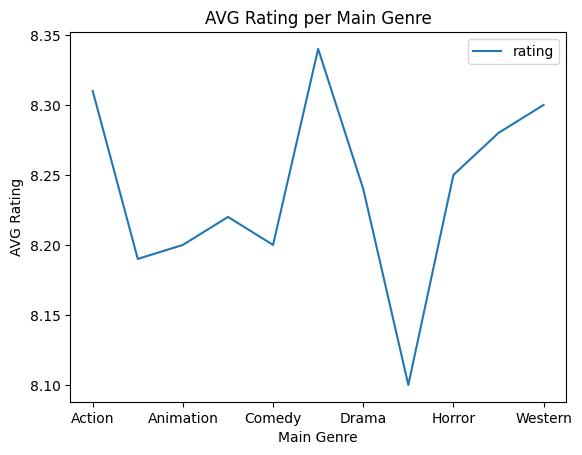

In [117]:
#visualizing the data
((df_analysis[["main_genre", "rating"]].groupby("main_genre", sort = True).mean()).round(2)).plot(kind = "line", title = "AVG Rating per Main Genre", xlabel = "Main Genre", ylabel = "AVG Rating")
#seems that action, crime and western might be the genres that have the movies with the highest values on average 

<AxesSubplot: title={'center': 'Movies x Rating'}, xlabel='Rating', ylabel='Movies'>

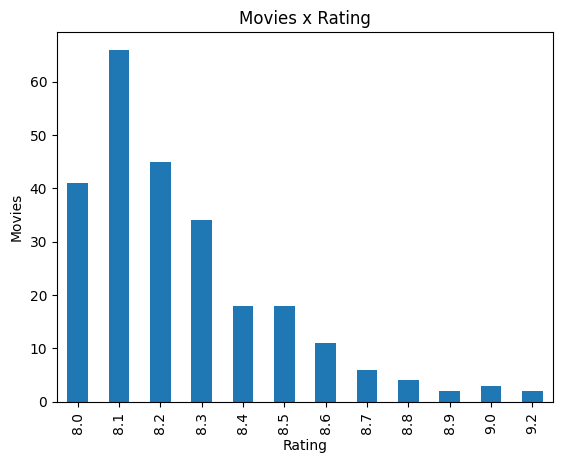

In [126]:
#how many movies there are per each rating value
(df_analysis.groupby("rating", sort = True).size()).plot(kind = "bar", title = "Movies x Rating", xlabel = "Rating", ylabel = "Movies")

<AxesSubplot: title={'center': 'Movies x Main Genre'}, xlabel='Main Genre', ylabel='Movies'>

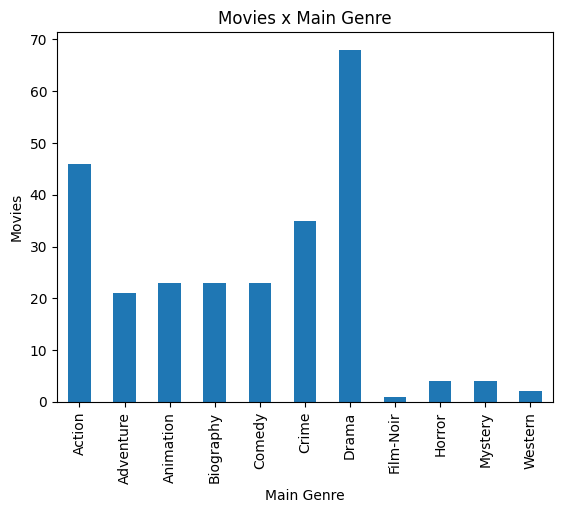

In [125]:
#how many movies there are per genre
(df_analysis.groupby("main_genre", sort = True).size()).plot(kind = "bar", title = "Movies x Main Genre", xlabel = "Main Genre", ylabel = "Movies")